Underfitting:
Underfitting, bir modelin veri setindeki gerçek ilişkileri yakalamak için yetersiz olduğu durumu ifade eder. Underfitting olan bir model, eğitim verilerine bile iyi uymaz ve genelleştirme yeteneği düşüktür. Bu durumda, model karmaşıklığı yetersiz olduğu için veri setinin içerdiği örüntüleri yakalayamaz. Örneğin, çok basit bir doğrusal model, karmaşık bir veri dağılımını yakalamakta başarısız olabilir. Underfitting olan bir model eğitim verilerine kötü uyarlandığı gibi, test verilerine de kötü uyarlanabilir.

Overfitting:
Overfitting, bir modelin eğitim verilerine çok fazla uyum sağladığı ve bu nedenle veri setindeki gürültüyü de yakaladığı durumu ifade eder. Bu durumda, model eğitim verilerine aşırı derecede adapte olmuş olur ve genelleştirme yeteneği düşer. Overfitting olan bir model, eğitim verilerine mükemmel uyum sağlarken, yeni verilere (test verileri gibi) kötü uyum sağlayabilir.

Overfitting, genellikle model karmaşıklığı arttıkça ve modelin veriye daha fazla uyum sağlama kapasitesi olduğunda ortaya çıkar. Overfitting'i önlemek için, modeli aşırı derecede karmaşık hale getirmeden önce uygun düzeyde düzenlemeler yapmak (örneğin, düzenleme terimleri eklemek veya özellik seçimini optimize etmek) veya daha fazla eğitim verisi toplamak gibi yöntemler kullanılabilir.

Hem underfitting hem de overfitting, iyi bir modelin yakalanmasına engel olabilir, bu nedenle makine öğrenimi projelerinde modelin uygun bir dengeyi bulması ve genelleştirme yapabilmesi önemlidir.

Makine öğrenimi veri kodlaması (data encoding), kategorik veya metinsel verileri sayısal değerlere dönüştürme işlemidir. Makine öğrenimi algoritmaları genellikle sayısal verilerle daha iyi çalışır, bu nedenle metin veya kategorik verileri sayısal olarak temsil etmek, veriyi işlemek ve modellemek için önemlidir. Veri kodlaması, veri ön işleme adımlarından biridir ve genellikle veri seti içindeki farklı türdeki özellikleri modele uygun hale getirme amacını taşır.

Veri kodlamasının amacı:

Veri Uyumlanması (Data Fitting): Makine öğrenimi algoritmaları sayısal verilerle daha iyi çalışır. Bu nedenle, metinsel veya kategorik verileri sayısal formata çevirerek, algoritmaların veriyi daha iyi anlamasını sağlar.

Kategorik Bilgiyi İfade Etme: Kategorik veriler, örneğin "renk" veya "kategoriler", sayısal değilse, bu bilgiyi sayısal forma dönüştürerek modele bu kategorik ilişkileri öğrenme fırsatı verir.

Veri Boyutunu Azaltma: Veri kodlaması, özellikle metinsel verilerin dönüştürülmesi sırasında, veri boyutunu azaltabilir. Bu, modelin daha hızlı eğitilmesini ve daha az hafıza kullanmasını sağlar.

Veri kodlaması yöntemleri:

Label Encoding (Etiket Kodlaması): Her bir kategoriye benzersiz bir sayı atanır. Bu yöntem, sıralı kategoriler için uygundur. Ancak, algoritmalara yanıltıcı bir sıralama bilgisi ekleyebilir.

One-Hot Encoding: Her bir kategori, binary bir vektör olarak temsil edilir. Her kategori için yeni bir özellik (sütun) oluşturulur ve sadece ilgili kategori için 1, diğerleri için 0 içerir. Bu yöntem, nominal (sırasız) kategoriler için uygundur.

Ordinal Encoding (Sıralı Kodlama): Kategoriler belirli bir sıralama veya derecelendirme ile ilişkilendirilir. Bu sıralama bilgisi, etiket kodlamasında olduğu gibi kullanılmak yerine, gerçek sıralama ilişkisini yakalamak amacıyla kullanılır.

Binary Encoding: Kategorik özellikleri önce sayısal bir değere dönüştürür ve ardından bu sayısal değeri ikili bir forma dönüştürür. Bu, özellikle çok sayıda farklı kategoriye sahip verilerde veri boyutunu azaltmak için kullanılabilir.

Frequency Encoding: Kategorileri o kategorinin veri setinde ne kadar sık görüldüğüne göre kodlar. Sıkça görülen kategorilere daha yüksek değerler atanır.

Target Encoding (Mean Encoding): Her kategoriye karşılık gelen hedef değişkenin ortalama değeri atanır. Bu, sınıf dengesizliği gibi durumlarda kullanışlı olabilir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [38]:
dataTrain = 'C:/Users/Sinan/Desktop/train.csv'
df = pd.read_csv(dataTrain, error_bad_lines=False)

df.head()

C:\Users\Sinan\AppData\Local\Temp\ipykernel_6064\3310127381.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(data_path, error_bad_lines=False)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
dataTest = pd.read_csv('C:/Users/Sinan/Desktop/test.csv')
idCol = dataTest['Id'].to_numpy()

dataTest.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [40]:
df = df.drop('Id', axis=1)
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

Correlation between different features and our target variable
Correlation coefficient
The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

Text(0.5, 1.0, 'Correlation coefficient between different features and SalePrice')

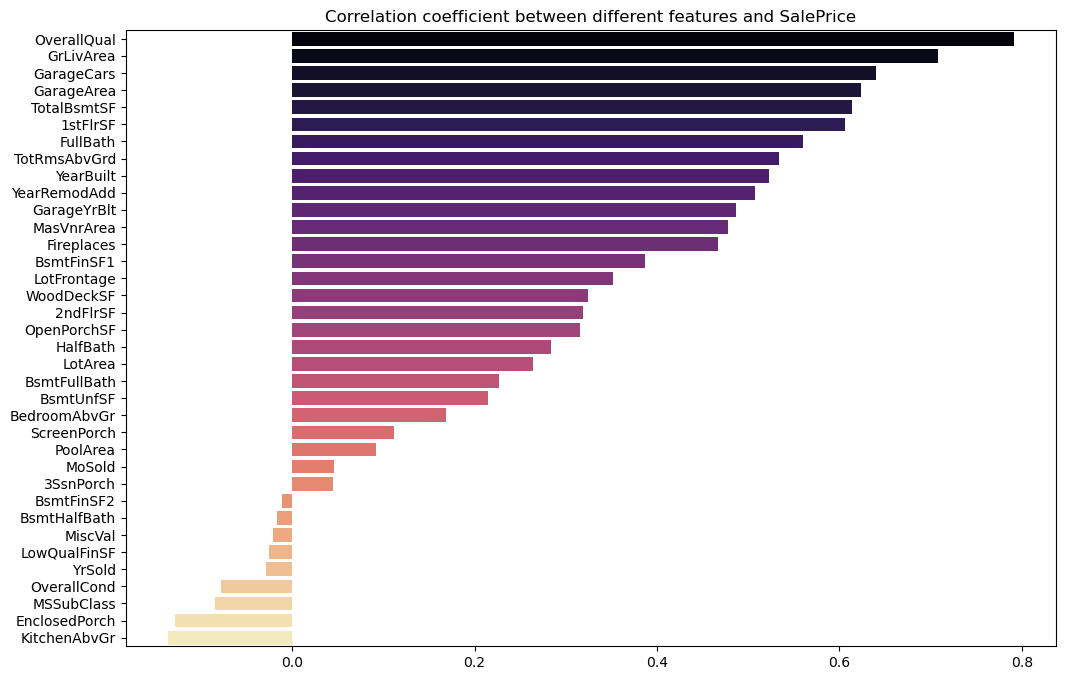

In [44]:
plt.figure(figsize=(12,8))
data = df.corr()["SalePrice"].sort_values(ascending=False)
indices = data.index
labels = []
corr = []
for i in range(1, len(indices)):
    labels.append(indices[i])
    corr.append(data[i])
sns.barplot(x=corr, y=labels, palette='magma')
plt.title('Correlation coefficient between different features and SalePrice')


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\Sinan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


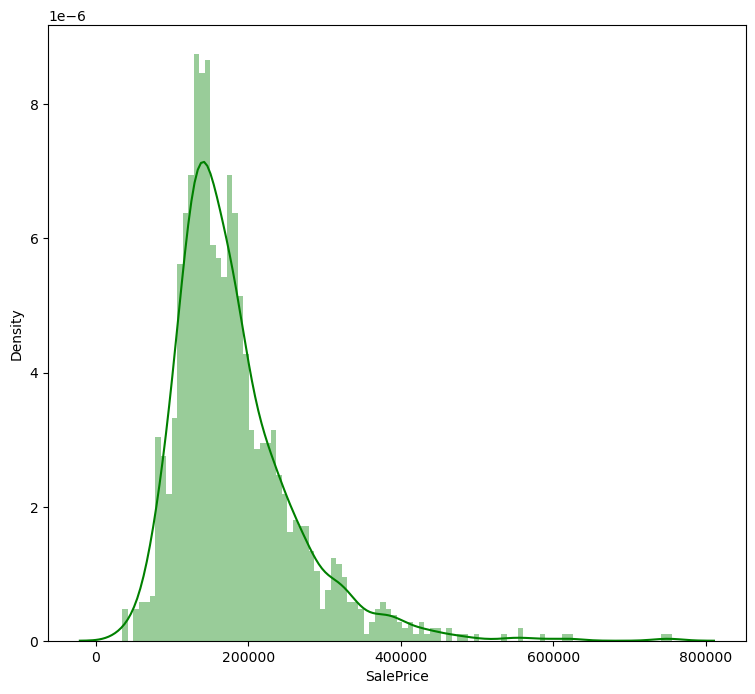

In [43]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [7]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [8]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


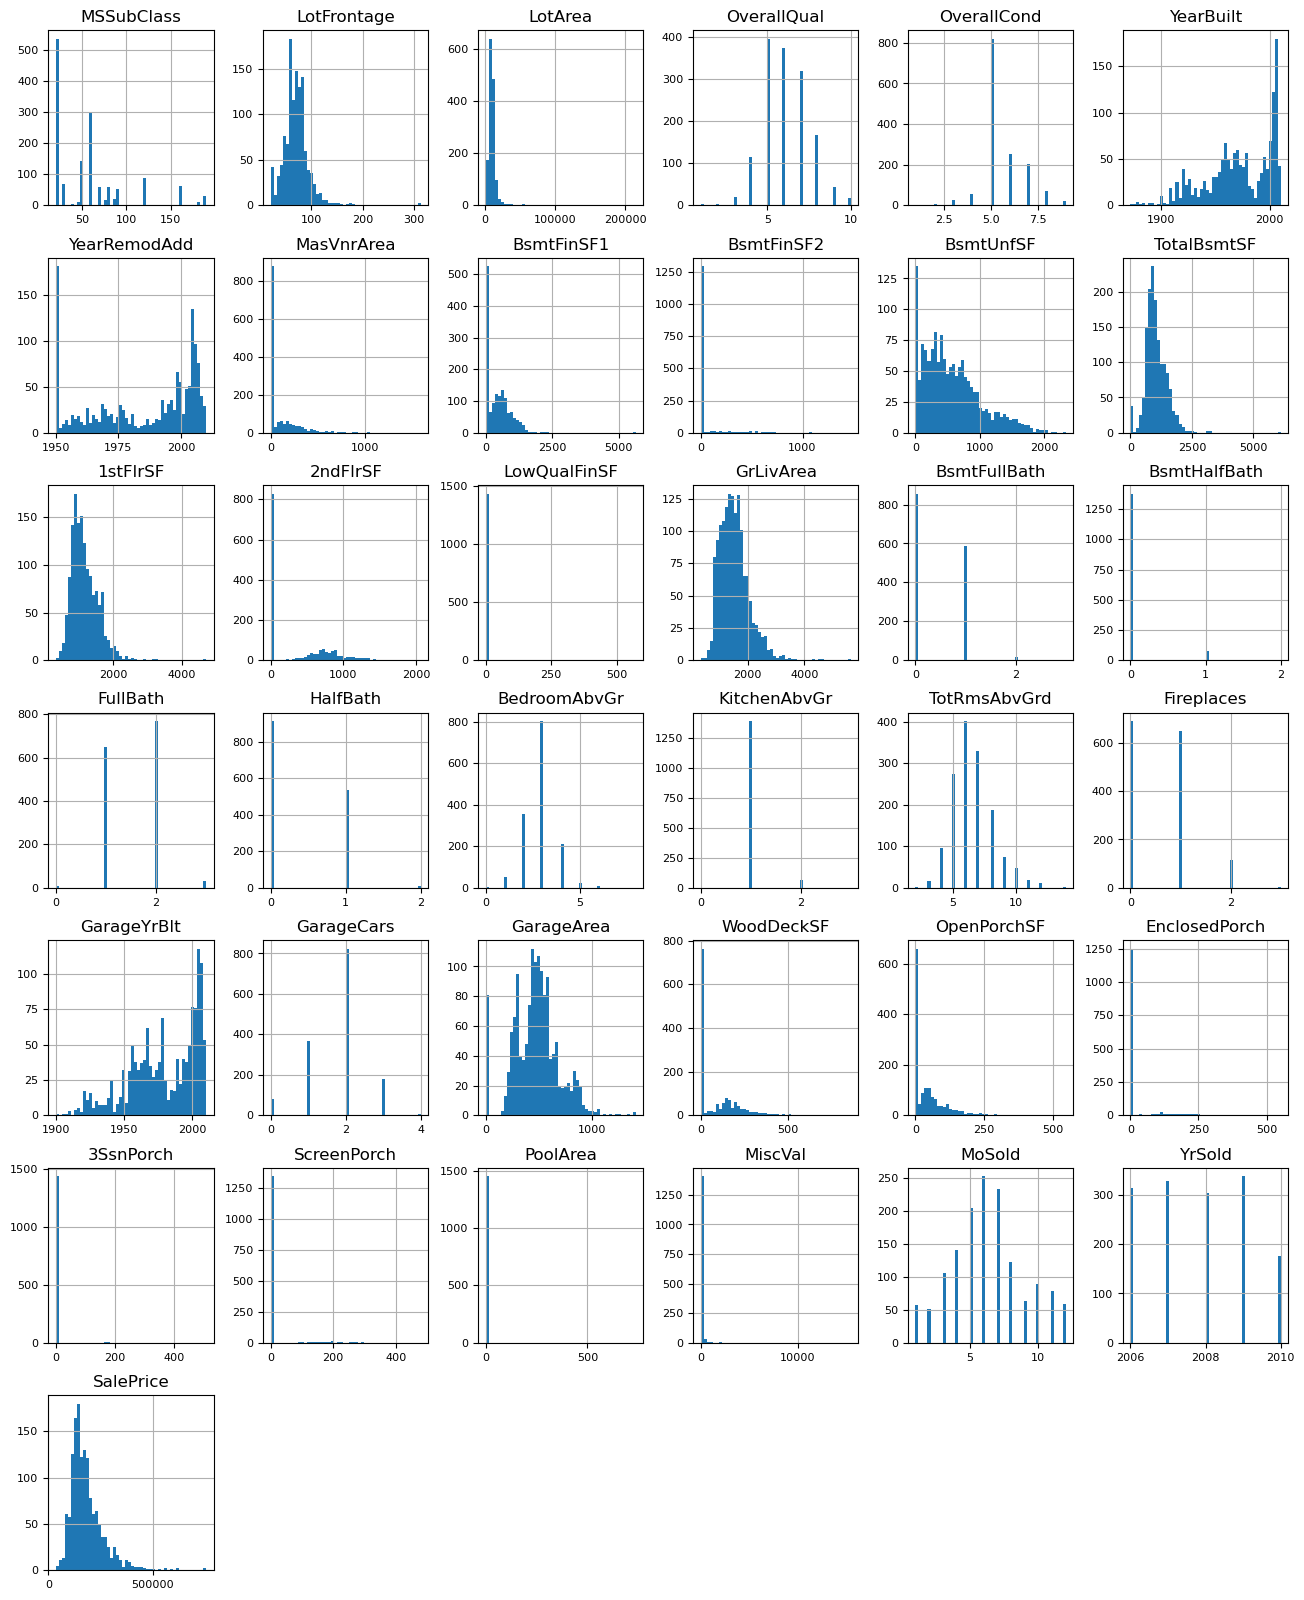

In [9]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [10]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [11]:
#One Hot Encoding (0 or 1)
X_encoded = pd.get_dummies(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [13]:
#Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LINEAR REGRESSION

In [14]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Linear Regression MSE:", mse_linear)

Linear Regression MSE: 6.158858049595892e+32


Random Forest Regression

In [15]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

GB Regression

In [16]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train_scaled, y_train)
y_pred_gb = gb_model.predict(X_test_scaled)

SUPPORT VECTOR MACHINE

In [17]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

KNN

In [18]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

DECISION TREE REGRESSION

In [19]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

In [20]:
# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    print(f"{model_name} Model:")
    print(f"R2 Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}\n")

In [21]:
evaluate_model(y_test, y_pred_linear, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regression")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Regression")
evaluate_model(y_test, y_pred_svr, "Support Vector Regression")
evaluate_model(y_test, y_pred_knn, "kNN Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree Regression")

Linear Regression Model:
R2 Score: -88259892466203569946624.0000
Mean Squared Error: 615885804959589165280578496364544.0000
Mean Absolute Error: 2247354924712949.2500

Random Forest Regression Model:
R2 Score: 0.8961
Mean Squared Error: 725044211.2590
Mean Absolute Error: 16895.2970

Gradient Boosting Regression Model:
R2 Score: 0.9097
Mean Squared Error: 630027995.4199
Mean Absolute Error: 16230.6837

Support Vector Regression Model:
R2 Score: -0.0319
Mean Squared Error: 7200715189.8845
Mean Absolute Error: 57026.2273

kNN Regression Model:
R2 Score: 0.7580
Mean Squared Error: 1688388527.6020
Mean Absolute Error: 24660.4009

Decision Tree Regression Model:
R2 Score: 0.7392
Mean Squared Error: 1820110938.6301
Mean Absolute Error: 26669.8447



 Random Forest and Gradient Boosting models seem to have the highest R2 scores and low error values compared to the others. These two models appear to have performed better in terms of generalization. The R2 scores of the other models being negative or low might indicate that they have either not fit the data well or achieved lower performance.

In [46]:
# Sonuçların Analizi
model_names = ["Linear Regression", "Random Forest Regression", "Gradient Boosting Regression", "Support Vector Regression", "kNN Regression", "Decision Tree Regression"]
results = {
    "Model": model_names,
    "R2 Score": [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_gb), r2_score(y_test, y_pred_svr), r2_score(y_test, y_pred_knn), r2_score(y_test, y_pred_dt)],
    "Mean Squared Error": [mean_squared_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_rf), mean_squared_error(y_test, y_pred_gb), mean_squared_error(y_test, y_pred_svr), mean_squared_error(y_test, y_pred_knn), mean_squared_error(y_test, y_pred_dt)],
    "Mean Absolute Error": [mean_absolute_error(y_test, y_pred_linear), mean_absolute_error(y_test, y_pred_rf), mean_absolute_error(y_test, y_pred_gb), mean_absolute_error(y_test, y_pred_svr), mean_absolute_error(y_test, y_pred_knn), mean_absolute_error(y_test, y_pred_dt)]
}

results_df = pd.DataFrame(results)
print(results_df)

                          Model      R2 Score  Mean Squared Error  \
0             Linear Regression -8.825989e+22        6.158858e+32   
1      Random Forest Regression  8.960971e-01        7.250442e+08   
2  Gradient Boosting Regression  9.097135e-01        6.300280e+08   
3     Support Vector Regression -3.190290e-02        7.200715e+09   
4                kNN Regression  7.580444e-01        1.688389e+09   
5      Decision Tree Regression  7.391679e-01        1.820111e+09   

   Mean Absolute Error  
0         2.247355e+15  
1         1.689530e+04  
2         1.623068e+04  
3         5.702623e+04  
4         2.466040e+04  
5         2.666984e+04  


In [47]:
# Overfitting Kontrolü ve Önlemler
# Örneğin, Random Forest modeli için max_depth parametresini sınırlayarak overfitting kontrolü sağlayabilirsiniz.
# Random Forest modeli için sınırlı derinlikli bir ağaç oluşturma:
rf_model = RandomForestRegressor(random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest Regression with Limited Depth")


Random Forest Regression with Limited Depth Model:
R2 Score: 0.8947
Mean Squared Error: 734803140.6920
Mean Absolute Error: 16971.0223



R2 Skoru: R2 skoru, bir modelin gerçek verilerin varyansını ne kadar iyi açıkladığını gösteren bir ölçüdür. Değer 1'e yaklaştıkça modelin daha iyi performans gösterdiği anlamına gelir. İki sonuç arasında R2 skoru bakımından neredeyse eşit bir performans görülmektedir. Random Forest Regression Model'in R2 skoru 0.8961, Limited Depth Model'in R2 skoru ise 0.8947'dir. Bu, modellerin benzer derecede gerçek verileri açıklama yeteneğine sahip olduğunu gösterir.

Mean Squared Error (MSE): MSE, gerçek değerler ile tahmin edilen değerler arasındaki farkların karesinin ortalamasıdır. Düşük MSE değeri, modelin daha iyi performans gösterdiğini gösterir. İki sonuç arasında MSE değeri bakımından daha düşük olan Random Forest Regression Model'i tercih edilebilir. MSE değeri 725044211.2590 olarak ölçülen Random Forest Regression Model, Limited Depth Model'in MSE değeri olan 734803140.6920'dan daha düşüktür.

Mean Absolute Error (MAE): MAE, gerçek değerler ile tahmin edilen değerler arasındaki mutlak farkların ortalamasıdır. Düşük MAE değeri, modelin daha iyi performans gösterdiğini gösterir. İki sonuç arasında MAE değeri bakımından da daha düşük olan Random Forest Regression Model'i tercih edilebilir. MAE değeri 16895.2970 olarak ölçülen Random Forest Regression Model, Limited Depth Model'in MAE değeri olan 16971.0223'ten daha düşüktür.

Sonuç olarak, her iki model de benzer bir performans sergilemekle birlikte, Random Forest Regression Model'in daha düşük MSE ve MAE değerleri ile daha iyi bir performans gösterdiği görülmektedir. Bu nedenle, bu iki sonuç arasında tercih edilecek model olarak Random Forest Regression Model öne çıkmaktadır.